[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 60, 50)              │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,851 (280.67 KB)

 Trainable params: 71,851 (280.67 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 15s 136ms/step - loss: 0.0583 - val_loss: 0.0024
Epoch 2/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - loss: 0.0070 - val_loss: 8.9490e-04
Epoch 3/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 171ms/step - loss: 0.0066 - val_loss: 8.1349e-04
Epoch 4/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - loss: 0.0053 - val_loss: 0.0010
Epoch 5/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0056 - val_loss: 0.0014
Epoch 6/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - loss: 0.0055 - val_loss: 0.0023
Epoch 7/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step - loss: 0.0047 - val_loss: 0.0011
Epoch 8/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 0.0045 - val_loss: 0.0019
Epoch 9/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - loss: 0.0045 - val_loss: 0.0013
Epoch 10/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - loss: 0.0049 - val_loss: 0.0017
Epoch 11/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 0.0038 - val_loss: 0.0019
Epoch 12/300
49/49 ━━━━━━━━

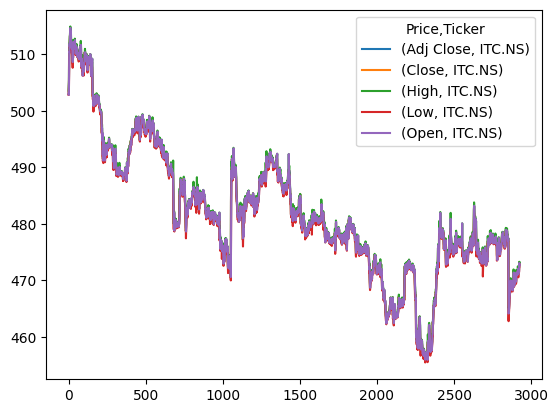

In [7]:
!pip install yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


df = yf.download('ITC.NS',interval="5m").reset_index()

df.head()
#scaling on closing price
scaler = MinMaxScaler(feature_range=(0,1))
'''
df['open_scale'] = scaler.fit_transform(np.array(df['Open']).reshape(-1,1))
df['high_scale'] = scaler.fit_transform(np.array(df['High']).reshape(-1,1))
df['low_scale'] = scaler.fit_transform(np.array(df['Low']).reshape(-1,1))
df['close_scale'] = scaler.fit_transform(np.array(df['Close']).reshape(-1,1))
df['adjc_scale'] = scaler.fit_transform(np.array(df['Adj Close']).reshape(-1,1))
'''
columns_to_scale = ['Open', 'High', 'Low', 'Close', 'Adj Close']
for column in columns_to_scale:
    df[f'{column.lower()}_scale'] = scaler.fit_transform(np.array(df[column]).reshape(-1, 1))


train_size = int(len(df) * 0.55)
val_size = int(len(df) * 0.20)
test_size = len(df) - train_size - val_size
cols = list(df)[1:6]

train_data = df[:train_size]
val_data = df[train_size:train_size + val_size]
test_data = df[train_size + val_size:]

train_data_scale = train_data[['open_scale', 'high_scale', 'low_scale', 'close_scale', 'adj close_scale']]
val_data_scale = val_data[['open_scale', 'high_scale', 'low_scale', 'close_scale', 'adj close_scale']]
test_data_scale = test_data[['open_scale', 'high_scale', 'low_scale', 'close_scale', 'adj close_scale']]


df_train=df[cols].astype('float')

df_plot = df_train.tail(5000)
df_plot.plot.line()

train_data_scale = train_data[['open_scale','high_scale','low_scale','close_scale','adj close_scale']]
train_data_scale.head()

# Preparing training data
def prepare_data(data, target_column='close_scale'):
    x_data, y_data = [], []
    for i in range(60, len(data)):
        x_data.append(data[i-60:i].values)
        y_data.append(data[target_column].iloc[i])
    return np.array(x_data), np.array(y_data)

x_train, y_train = prepare_data(train_data_scale)
x_val, y_val = prepare_data(val_data_scale)
x_test, y_test = prepare_data(test_data_scale)

# Reshape data to 3D format
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 5))
x_val = x_val.reshape((x_val.shape[0], x_val.shape[1], 5))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 5))



x_train, y_train = prepare_data(train_data_scale)
x_val, y_val = prepare_data(val_data_scale)
x_test, y_test = prepare_data(test_data_scale)

test_data_scale = test_data[['open_scale','high_scale','low_scale','close_scale','adj close_scale']]
test_data_scale.shape
test_data_scale.head()
test_data.head()

# Reshape data to 3D format
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 5))
x_val = x_val.reshape((x_val.shape[0], x_val.shape[1], 5))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 5))



x_test =[]
y_test = test_data['close_scale'] # test data scaled value is put in ytest--herewe r testing

for i in range(60,len(test_data)):
    new_var = test_data_scale[i-60:i]
    x_test.append(new_var)

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],5))

from keras.models import Sequential
from keras.layers import GRU, Bidirectional, LSTM, Dense, Dropout

from keras.models import Sequential
from keras.layers import LSTM, GRU, Dropout, Dense





######################

#Build LSTM model
#initialize model
model = Sequential()

#Lstm layer 1
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],5)))# units=50--hidden neurons -take above 20 --to extract features
model.add(Dropout(0.25))

#Lstm layer 2
model.add(LSTM(units=50,return_sequences=True)) # return_sequences -- its to take above lstm(extracted features) to used here
model.add(Dropout(0.25))

#Lstm layer 3
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.25))

#Lstm layer 4
model.add(LSTM(units=50))
model.add(Dropout(0.25))


#Lstm layer 5
model.add(Dense(units=1))
model.summary()



model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=300, batch_size=32, validation_data=(x_val, y_val))



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Price        Close Predicted
Ticker      ITC.NS          
2921    471.500000       NaN
2922    472.500000       NaN
2923    473.200012       NaN
2924    472.700012       NaN
2925    472.850006       NaN


<ipython-input-8-0ae36f55e39a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted'] = np.nan
<ipython-input-8-0ae36f55e39a>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single ste

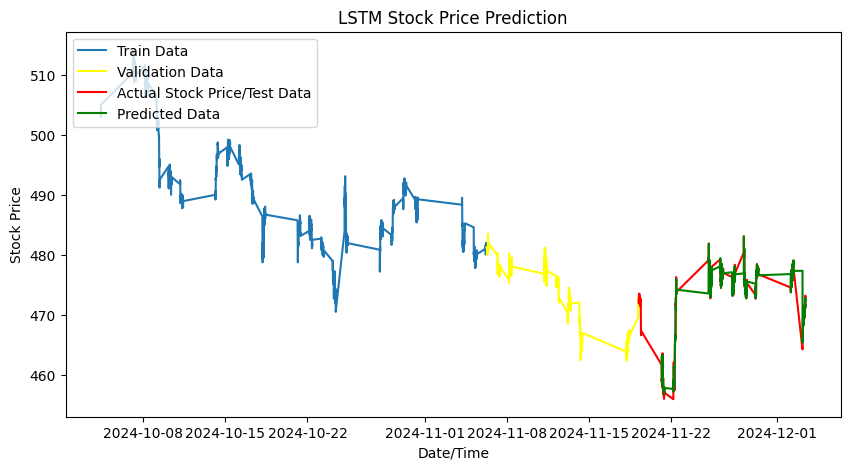

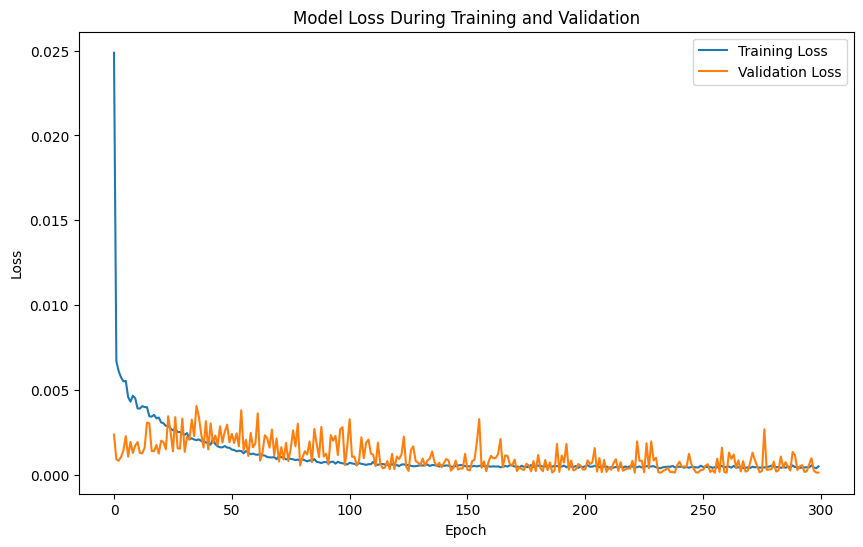

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step
Mean Squared Error (MSE): 0.9552000536918751
Root Mean Squared Error (RMSE): 0.977343365297926
Mean Absolute Error (MAE): 0.5959098906744094
R-squared (R2): 0.9791783094406128


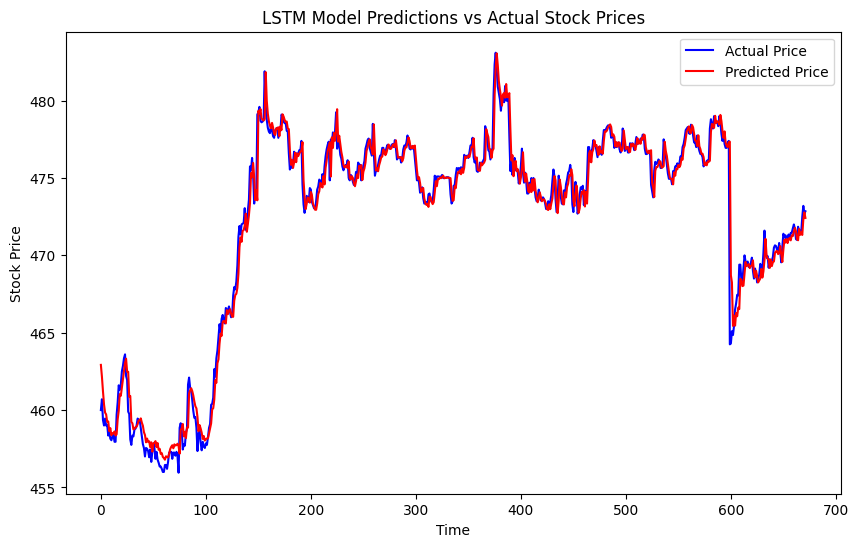

In [8]:

predicted_stock_price = model.predict(x_test)

predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Create a new column in test_data for the predicted values
test_data['Predicted'] = np.nan
test_data['Predicted'].iloc[-len(predicted_stock_price):] = predicted_stock_price.flatten()

# Check if the 'Predicted' column exists
print(test_data[['Close', 'Predicted']].tail())


#plot all the series together

plt.figure(figsize=(10,5),dpi=100)
plt.plot(train_data['Datetime'],train_data['Close'],label='Train Data')
plt.plot(val_data['Datetime'],val_data['Close'],color='yellow',label='Validation Data')
plt.plot(test_data['Datetime'],test_data['Close'],color='red',label='Actual Stock Price/Test Data')
plt.plot(test_data[60:]['Datetime'],predicted_stock_price,color='green',label='Predicted Data')

plt.title('LSTM Stock Price Prediction')
plt.xlabel('Date/Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left')
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Making predictions on test data
predicted_stock_price = model.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Making predictions on test data

predicted_stock_price = model.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Calculate metrics for the model on test data
mse = mean_squared_error(test_data['Close'].iloc[60:], predicted_stock_price)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['Close'].iloc[60:], predicted_stock_price)
r2 = r2_score(test_data['Close'].iloc[60:], predicted_stock_price)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# Visualizing model performance on test data
plt.figure(figsize=(10, 6))
plt.plot(test_data['Close'].iloc[60:].values, label='Actual Price', color='blue')
plt.plot(predicted_stock_price, label='Predicted Price', color='red')
plt.title('LSTM Model Predictions vs Actual Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()




1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


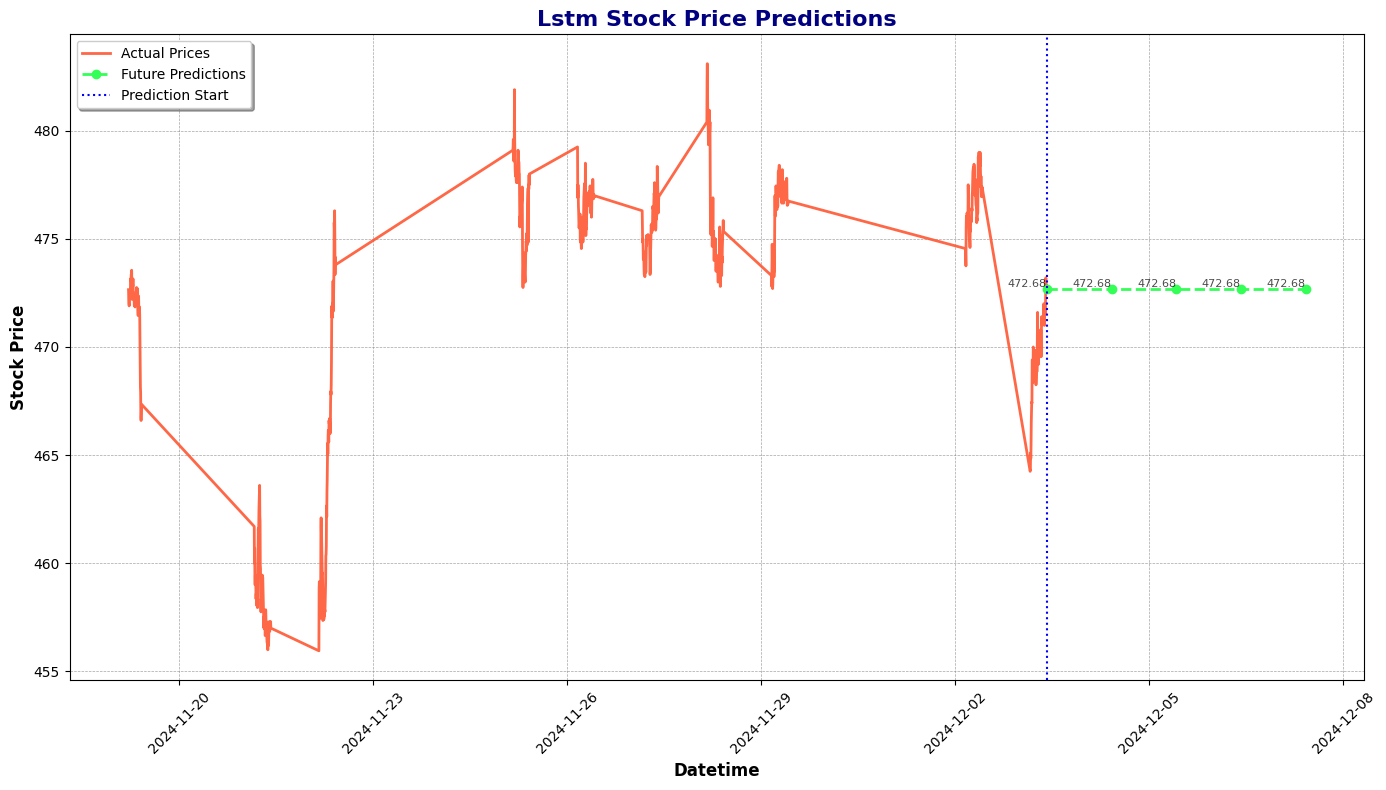

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.dates import DateFormatter

def predict_future_prices(model, data, days=1):
    predictions = []
    # Get the last 60 data points with all 5 features
    current_data = data[-60:].reshape(-1, 1)

    for _ in range(days):
        # Reshape current_data to match the model's input shape (1, 60, 5)
        pred = model.predict(current_data.reshape(1, 60, 5))
        predictions.append(pred[0, 0])

        # Update current_data by removing the first row and appending the prediction
        current_data = np.append(current_data[1:], [[pred[0, 0]] * 1], axis=0)

    return predictions

# Make predictions for the next 15
future_predictions_scaled = predict_future_prices(model, test_data_scale.values, days=1)

# Inverse transform the scaled predictions back to original values
future_predictions = scaler.inverse_transform(np.array(future_predictions_scaled).reshape(-1, 1))

# Generate future dates for the next 5 days
future_dates = pd.date_range(start=test_data['Datetime'].iloc[-1] + pd.Timedelta(minutes=15), periods=5, freq='D')
future_df = pd.DataFrame({'Predicted': future_predictions.flatten()}, index=future_dates)

# Concatenate actual test data with future predictions for visualization
all_data = pd.concat([test_data['Close'].reset_index(drop=True), future_df['Predicted']], axis=0)
all_data.index = list(test_data['Datetime']) + list(future_dates)

# Enhanced Plotting
plt.figure(figsize=(14, 8))

# Plot actual prices
plt.plot(test_data['Datetime'], test_data['Close'], label='Actual Prices', color='#FF5733', linewidth=2, alpha=0.9)

# Plot future predictions
plt.plot(future_df.index, future_df['Predicted'], label='Future Predictions', color='#33FF57', linewidth=2, linestyle='--', marker='o')

# Highlight the start of predictions
plt.axvline(x=future_dates[0], color='blue', linestyle='dotted', linewidth=1.5, label='Prediction Start')

# Add gridlines for better readability
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add title and labels with styling
plt.title('Lstm Stock Price Predictions', fontsize=16, weight='bold', color='navy')
plt.xlabel('Datetime', fontsize=12, weight='bold')
plt.ylabel('Stock Price', fontsize=12, weight='bold')

# Format x-axis for better appearance
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add legend with styling
plt.legend(fontsize=10, loc='upper left', fancybox=True, shadow=True)

# Add annotations for the predicted data points
for i, (date, price) in enumerate(zip(future_df.index, future_df['Predicted'])):
    plt.text(date, price, f"{price:.2f}", fontsize=8, ha='right', va='bottom', color='black', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step

Performance Metrics:
Total Profit: $126.48
Total Returns: 1.26%
Sharpe Ratio: 0.32
Maximum Drawdown: -1.01

Trades Made During Backtesting:
    Action       Price  Shares          Cash
0      Buy  459.239044    21.0    355.980072
1      Buy  459.150360     0.0    355.980072
2      Buy  458.751953     0.0    355.980072
3      Buy  458.799011     0.0    355.980072
4      Buy  458.894043     0.0    355.980072
..     ...         ...     ...           ...
325   Sell  468.965851    21.0  10098.327026
326    Buy  469.191589    21.0    245.303650
327   Sell  469.727234    21.0  10109.575562
328    Buy  469.575226    21.0    248.495819
329   Sell  470.380188    21.0  10126.479767

[330 rows x 4 columns]


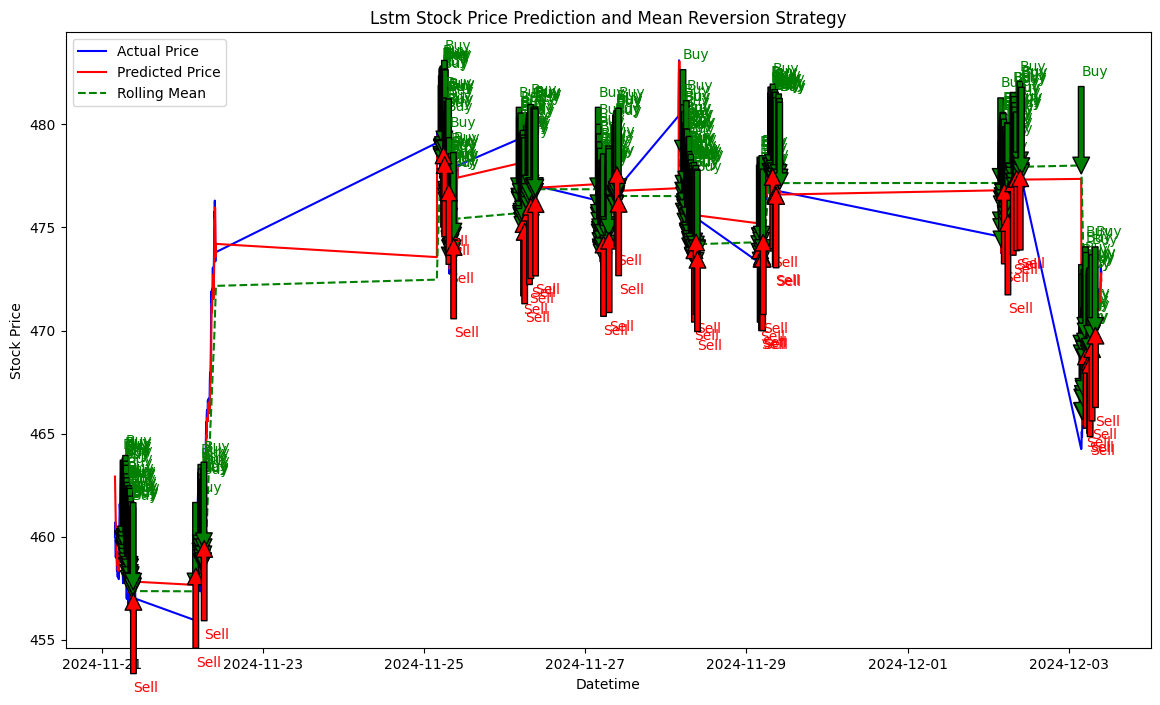

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize parameters for backtesting
initial_capital = 10000  # Starting with $10,000
cash = initial_capital  # Available cash
position = 0  # Number of shares owned
portfolio_value = initial_capital  # Total portfolio value (cash + stock value)
trades = []  # List to store trade actions

# Get predicted stock prices from GRU model
predicted_stock_price = model.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Convert predicted stock prices into a DataFrame for backtesting
predicted_prices = pd.Series(predicted_stock_price.flatten(), index=test_data['Datetime'][60:])

# Define rolling window for calculating mean (e.g., 20 days)
rolling_window = 20
rolling_mean = predicted_prices.rolling(window=rolling_window).mean()

# Backtesting mean-reversion strategy
buy_points = []  # To store buy points
sell_points = []  # To store sell points

for i in range(rolling_window, len(predicted_prices)):
    current_price = predicted_prices.iloc[i]
    mean_price = rolling_mean.iloc[i]

    # Buy if current price is below the mean
    if current_price < mean_price and cash > 0:
        shares_to_buy = cash // current_price  # Maximum number of shares we can buy
        cash -= shares_to_buy * current_price
        position += shares_to_buy
        trades.append({'Action': 'Buy', 'Price': current_price, 'Shares': shares_to_buy, 'Cash': cash})
        buy_points.append((predicted_prices.index[i], current_price))  # Store buy point

    # Sell if current price is above the mean and we hold stocks
    elif current_price > mean_price and position > 0:
        cash += position * current_price  # Sell all shares
        trades.append({'Action': 'Sell', 'Price': current_price, 'Shares': position, 'Cash': cash})
        position = 0  # Reset position
        sell_points.append((predicted_prices.index[i], current_price))  # Store sell point

    # Update portfolio value
    portfolio_value = cash + position * current_price

# Calculate final portfolio value and profit
final_portfolio_value = cash + position * predicted_prices.iloc[-1]
total_profit = final_portfolio_value - initial_capital  # Total profit = Final Value - Initial Capital
total_returns = (final_portfolio_value - initial_capital) / initial_capital * 100  # Total returns percentage
sharpe_ratio = np.mean(predicted_prices.pct_change()) / np.std(predicted_prices.pct_change()) * np.sqrt(252)  # Assuming daily data
max_drawdown = (1 - min(cash + position * predicted_prices)) / initial_capital  # Maximum drawdown

# Print the results
print("\nPerformance Metrics:")
print(f"Total Profit: ${total_profit:.2f}")
print(f"Total Returns: {total_returns:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {max_drawdown:.2f}")

# Plot the trades made during backtesting
trades_df = pd.DataFrame(trades)
print("\nTrades Made During Backtesting:")
print(trades_df)

# Visualize the strategy performance (Actual vs Predicted)
plt.figure(figsize=(14, 8))
plt.plot(test_data['Datetime'][60:], test_data['Close'].iloc[60:], label='Actual Price', color='blue')
plt.plot(predicted_prices.index, predicted_prices, label='Predicted Price', color='red')
plt.plot(rolling_mean.index, rolling_mean, label='Rolling Mean', color='green', linestyle='--')

# Plot buy and sell arrows
for point in buy_points:
    plt.annotate('Buy', xy=point, xytext=(point[0], point[1] + 5),
                 arrowprops=dict(facecolor='green', shrink=0.05), fontsize=10, color='green')

for point in sell_points:
    plt.annotate('Sell', xy=point, xytext=(point[0], point[1] - 5),
                 arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, color='red')

plt.title('Lstm Stock Price Prediction and Mean Reversion Strategy')
plt.xlabel('Datetime')
plt.ylabel('Stock Price')
plt.legend(loc='upper left')
plt.show()
